In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('data/COVID19/Covid-19_SG.csv')
df.index = df['Date'].apply(lambda s: datetime.strptime(s, '%Y-%m-%d'))
df.head()

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population taken booster shots
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,2020-01-23,1,NaN,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2020-01-24,2,NaN,3,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,2020-01-25,1,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,2020-01-26,0,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,2020-01-27,1,NaN,5,0,0,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


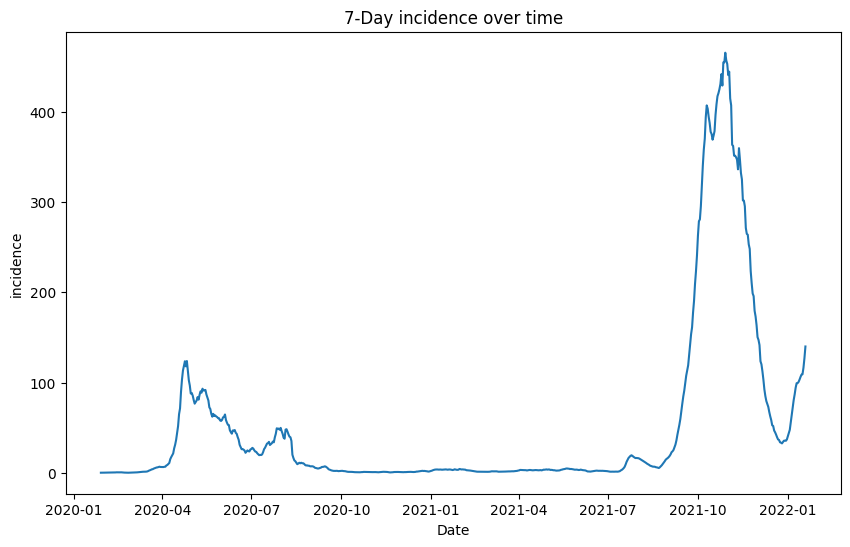

In [2]:
import matplotlib.pyplot as plt

# 7-day rolling average
rolling_sum = df['Daily Confirmed'].rolling(window=7).sum()*100000/5680000

# Create a plot
plt.figure(figsize=(10,6))
plt.plot(rolling_sum)
plt.title('7-Day incidence over time')
plt.xlabel('Date')
plt.ylabel('incidence')
plt.show()


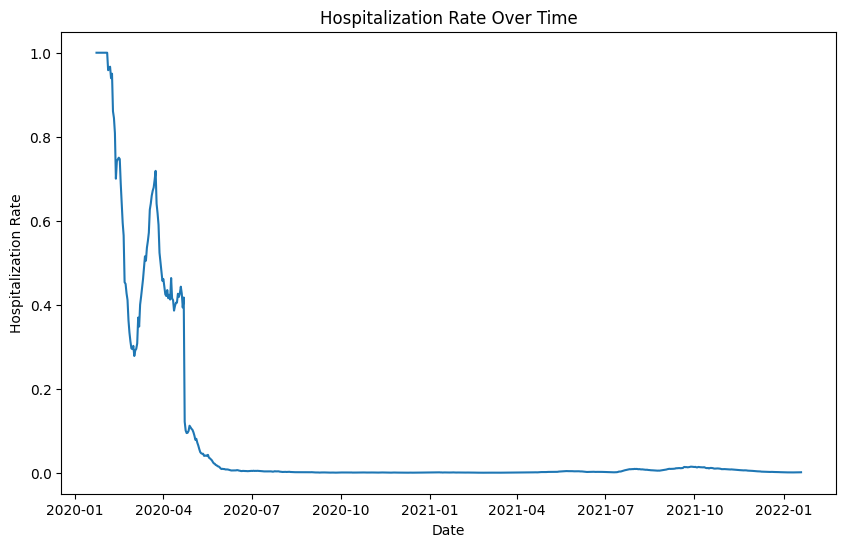

In [3]:
# hospitalization rate
hospitalization_rate = df['Still Hospitalised'] / df['Cumulative Confirmed']

# Create a plot
plt.figure(figsize=(10,6))
plt.plot(hospitalization_rate)
plt.title('Case Hospitalization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Hospitalization Rate')
plt.show()

In [4]:
def calculate_criticality(incidence):
    if incidence > 400:
        return 4
    elif incidence > 200:
        return 3
    elif incidence > 100:
        return 2
    elif incidence > 50:
        return 1
    else:
        return 0

# 7-day incidence
incidence_7_days = df['Daily Confirmed'].rolling(window=7).sum()*100000/5680000

# 7-day criticality score
criticality_7_days = incidence_7_days.apply(calculate_criticality)

# minimum criticality score over the last 7 days
min_criticality_7_days = criticality_7_days.rolling(window=7).min()

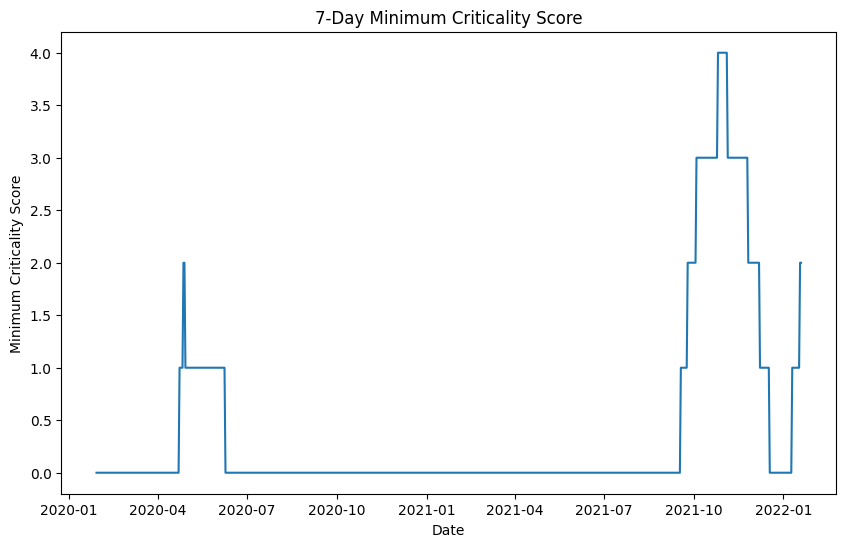

In [5]:
# Create a plot
plt.figure(figsize=(10,6))
plt.plot(min_criticality_7_days)
plt.title('7-Day Minimum Criticality Score')
plt.xlabel('Date')
plt.ylabel('Minimum Criticality Score')
plt.show()